In [121]:
#Import the required Packages
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.manifold import TSNE
from IPython.core.interactiveshell import InteractiveShell
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
warnings.filterwarnings('ignore') # to supress seaborn warnings
import os

In [122]:
data_dir ='C:/Users/Keerthi/Desktop/working/'
os.chdir(data_dir)

In [123]:
# Read the data into DataFrames.
train = pd.read_csv("credit_card_default_TRAIN.csv",index_col=0)
test = pd.read_csv("credit_card_default_TEST.csv",index_col=0)

In [124]:
train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [125]:
test.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
ID,,,,,,,,,,,,,,,,,,,,,
22501,180000,2,2,1,33,-1,-1,-1,-1,-1,...,1112,10383,1980,2672,0,1112,10383,1980,2672,2197
22502,230000,2,1,2,33,0,0,0,0,0,...,41354,42368,43161,45056,2000,2000,2000,1800,2600,2000
22503,50000,2,2,2,44,0,0,2,3,2,...,20857,20229,19623,19878,3155,2500,0,0,707,713
22504,260000,2,2,2,32,0,0,0,0,0,...,234260,227884,202178,198467,10000,9014,11002,7503,7502,7500
22505,260000,2,2,2,33,-1,-1,-1,-1,-1,...,28656,7497,7685,15434,13000,29022,7500,27769,12000,6200


#### Check for Null values in the datasets

In [126]:

train.isnull().values.any(),test.isnull().values.any()

(False, False)

DataSets do not have any Null values


### Combine Train and Test Data set for further analysis & preprocessing

In [127]:
train.isnull().values.any(),test.isnull().values.any()

(False, False)

In [128]:
train['Type'] = 'Train'
test['Type'] = 'Test'
test['default payment next month']=0

In [129]:

fulldata = pd.concat([train,test],axis=0) 

In [130]:
fulldata.isnull().values.any()

False

In [131]:
fulldata.rename(columns={'default payment next month':'DEFAULT'}, inplace=True)

In [132]:
fulldata.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,LIMIT_BAL,MARRIAGE,...,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,Type,DEFAULT
ID,,,,,,,,,,,,,,,,,,,,,
1,24,3913,3102,689,0,0,0,2,20000,1,...,-2,0,689,0,0,0,0,2,Train,1
2,26,2682,1725,2682,3272,3455,3261,2,120000,2,...,2,0,1000,1000,1000,0,2000,2,Train,1
3,34,29239,14027,13559,14331,14948,15549,2,90000,2,...,0,1518,1500,1000,1000,1000,5000,2,Train,0
4,37,46990,48233,49291,28314,28959,29547,2,50000,1,...,0,2000,2019,1200,1100,1069,1000,2,Train,0
5,57,8617,5670,35835,20940,19146,19131,2,50000,1,...,0,2000,36681,10000,9000,689,679,1,Train,0


In [133]:
fulldata.describe()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,LIMIT_BAL,MARRIAGE,...,PAY_5,PAY_6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,SEX,DEFAULT
count,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,1.853133,167484.322667,1.551867,...,-0.266200,-0.291100,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,1.603733,0.169600
std,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,0.790349,129747.661567,0.521970,...,1.133187,1.149988,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.489129,0.375287
min,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,10000.000000,0.000000,...,-2.000000,-2.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1.000000,50000.000000,1.000000,...,-1.000000,-1.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,1.000000,0.000000
50%,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2.000000,140000.000000,2.000000,...,0.000000,0.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,2.000000,0.000000
75%,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,2.000000,240000.000000,2.000000,...,0.000000,0.000000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,2.000000,0.000000
max,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,6.000000,1000000.000000,3.000000,...,8.000000,8.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,2.000000,1.000000


    From Above Table we can deduce that some columns have extra values which might not be correct According to the Description given i.e.
                EDUCATION has 7 unique values instead of 4
                MARRIAGE has 4 unique values instead of 3

In [134]:
fulldata.EDUCATION.value_counts()


2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

According to description we should have values 1,2,3,4 thus we will change 5,6,0 to 4 i.e. others

In [135]:
fulldata.EDUCATION[fulldata.EDUCATION=='0']='4'
fulldata.EDUCATION[fulldata.EDUCATION=='5']='4'
fulldata.EDUCATION[fulldata.EDUCATION=='6']='4'
fulldata.EDUCATION.unique()

array([2, 1, 3, 5, 4, 6, 0], dtype=int64)

In [136]:
fulldata.MARRIAGE.value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

According to description we should have values 1,2,3 thus we will change 0 to 3 i.e. others

In [137]:
fulldata.MARRIAGE[fulldata.MARRIAGE=='0']='3'
fulldata.MARRIAGE.unique()

array([1, 2, 3, 0], dtype=int64)

In [138]:
fulldata.SEX.unique()

array([2, 1], dtype=int64)

In [139]:
# Check for values less than 0
(fulldata.AGE[fulldata.AGE<0].count(),
fulldata.LIMIT_BAL[fulldata.LIMIT_BAL<0].count())

(0, 0)

In [140]:
# Split back the combined data to train & test
train=fulldata[fulldata['Type']=='Train']
test=fulldata[fulldata['Type']=='Test']

In [141]:
# drop the non numeric column
train.drop(['Type'],axis = 1, inplace=True)
test.drop(['Type'],axis = 1, inplace=True)

# Change variables to type float
train = train.astype(float)
test = test.astype(float)

## 2. Exploratory Data Analysis and Visualization

In [143]:
train.DEFAULT.mean()*100

22.613333333333333

22.61 % of people are defaulters in the Train data

    Visualize Data with t-SNE
t-SNE is a technique for dimensionality reduction that is well suited to visualise high-dimensional datasets. Lets have a first look on the map that will set some expectations for the prediction accuracy i.e. if our dataset has many overlaps it would be good if our model achieves an accuracy of 60-70%.!

In [144]:
df4.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,BILL_AMT_APR_2005,BILL_AMT_AUG_2005,BILL_AMT_JULY_2005,...,PAY_AMT5,PAY_AMT6,PAY_AMT_APR_2005,PAY_AMT_AUG_2005,PAY_AMT_JULY_2005,PAY_AMT_JUN_2005,PAY_AMT_MAY_2005,PAY_AMT_SEPT_2005,SEX,DEFAULTER
ID,,,,,,,,,,,,,,,,,,,,,
830,48.0,20944.0,4696.0,47225.0,16483.0,9343.0,9693.0,NaN,NaN,NaN,...,500.0,503.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0
16767,34.0,8603.0,7757.0,8742.0,6041.0,5383.0,0.0,NaN,NaN,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
10426,50.0,612.0,10612.0,2225.0,4782.0,416.0,12287.0,NaN,NaN,NaN,...,12287.0,416.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0
14380,35.0,38486.0,39217.0,40537.0,41030.0,41891.0,43196.0,NaN,NaN,NaN,...,2000.0,1592.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0
8323,28.0,2162.0,61.0,259323.0,139861.0,1684.0,826.0,NaN,NaN,NaN,...,826.0,1793.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0


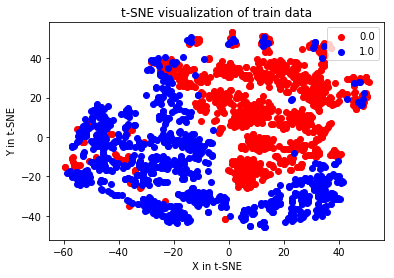

In [147]:
#Set df4 equal to a set of a sample of 1000 deafault and 1000 non-default observations.
df2 = train[train.DEFAULT == 0].sample(n = 1000)
df3 = train[train.DEFAULT == 1].sample(n = 1000)
df4 = pd.concat([df2, df3], axis = 0)

#Scale features to improve the training ability of TSNE.
standard_scaler = StandardScaler()
df4_std = standard_scaler.fit_transform(df4)

#Set y equal to the target values.
y = df4.DEFAULT

tsne = TSNE(n_components=2, random_state=0)
x_test_2d = tsne.fit_transform(df4_std)

#Build the scatter plot with the two types of transactions.
color_map = {0:'red', 1:'blue'}
plt.figure()
for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x = x_test_2d[y==cl,0], y = x_test_2d[y==cl,1], c = color_map[idx], label = cl)
plt.xlabel('X in t-SNE')
plt.ylabel('Y in t-SNE')
plt.legend(loc='upper right')
plt.title('t-SNE visualization of train data')
plt.show()

The plot reveals a rather mixed up dataset which means we should not expect very accurate model.



Now let us check the correlation between different features

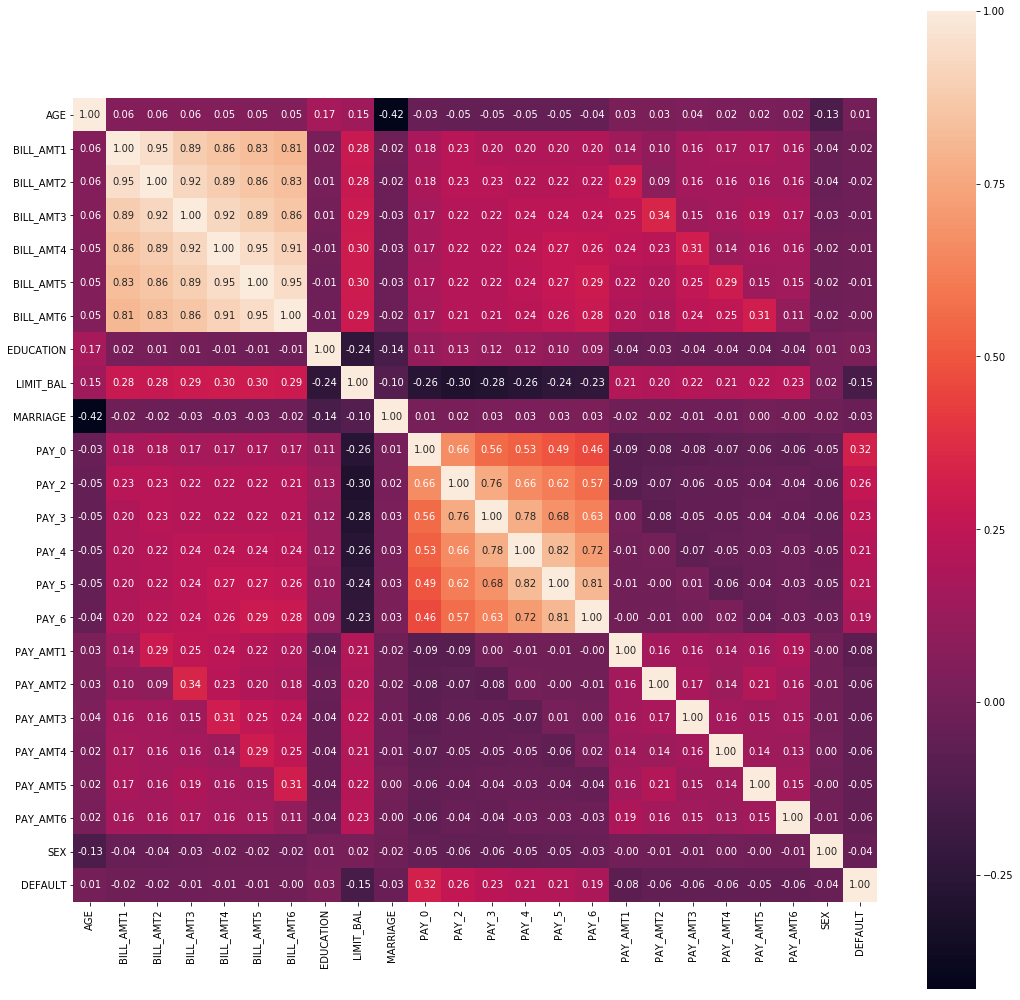

In [148]:
cor = train.corr()
plt.figure(figsize=(18,18))
sns.heatmap(cor, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 10},
            xticklabels=cor.columns.values,
            yticklabels=cor.columns.values)

    Figure shows that 'BILL_AMTX' are highly correlated to each other, but very less correlation to target label 'DEFAULT'.
     When data is huge to save computational resource, such features can be dropped without losing significant prediction power.

    Payment statuses 'PAY' show highest contribution to the defaulter label.

We can see above that PAY_0,PAY_2...have high positive correlation to DEFAULT and LIMIT_BAL has pretty high negative correlation

### Feature Engineering


The regression coefficients are positive i.e. log-odds of defaulters increase as the ratio of  (bill amount−pay amountcredit limit)  increases. Hence we can add below 6 features.

In [149]:
train['BILL_PAY_RATIO1'] = (train['BILL_AMT1']-train['PAY_AMT1'])/train['LIMIT_BAL']
train['BILL_PAY_RATIO2'] = (train['BILL_AMT2']-train['PAY_AMT2'])/train['LIMIT_BAL']
train['BILL_PAY_RATIO3'] = (train['BILL_AMT3']-train['PAY_AMT3'])/train['LIMIT_BAL']
train['BILL_PAY_RATIO4'] = (train['BILL_AMT4']-train['PAY_AMT4'])/train['LIMIT_BAL']
train['BILL_PAY_RATIO5'] = (train['BILL_AMT5']-train['PAY_AMT5'])/train['LIMIT_BAL']
train['BILL_PAY_RATIO6'] = (train['BILL_AMT6']-train['PAY_AMT6'])/train['LIMIT_BAL']

test['BILL_PAY_RATIO1'] = (test['BILL_AMT1']-test['PAY_AMT1'])/test['LIMIT_BAL']
test['BILL_PAY_RATIO2'] = (test['BILL_AMT2']-test['PAY_AMT2'])/test['LIMIT_BAL']
test['BILL_PAY_RATIO3'] = (test['BILL_AMT3']-test['PAY_AMT3'])/test['LIMIT_BAL']
test['BILL_PAY_RATIO4'] = (test['BILL_AMT4']-test['PAY_AMT4'])/test['LIMIT_BAL']
test['BILL_PAY_RATIO5'] = (test['BILL_AMT5']-test['PAY_AMT5'])/test['LIMIT_BAL']
test['BILL_PAY_RATIO6'] = (test['BILL_AMT6']-test['PAY_AMT6'])/test['LIMIT_BAL']

In [150]:
train.head()

,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,EDUCATION,LIMIT_BAL,MARRIAGE,...,PAY_AMT5,PAY_AMT6,SEX,DEFAULT,BILL_PAY_RATIO1,BILL_PAY_RATIO2,BILL_PAY_RATIO3,BILL_PAY_RATIO4,BILL_PAY_RATIO5,BILL_PAY_RATIO6
ID,,,,,,,,,,,,,,,,,,,,,
1,24.0,3913.0,3102.0,689.0,0.0,0.0,0.0,2.0,20000.0,1.0,...,0.0,0.0,2.0,1.0,0.195650,0.120650,0.034450,0.000000,0.000000,0.000000
2,26.0,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,2.0,120000.0,2.0,...,0.0,2000.0,2.0,1.0,0.022350,0.006042,0.014017,0.018933,0.028792,0.010508
3,34.0,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,2.0,90000.0,2.0,...,1000.0,5000.0,2.0,0.0,0.308011,0.139189,0.139544,0.148122,0.154978,0.117211
4,37.0,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2.0,50000.0,1.0,...,1069.0,1000.0,2.0,0.0,0.899800,0.924280,0.961820,0.544280,0.557800,0.570940
5,57.0,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2.0,50000.0,1.0,...,689.0,679.0,1.0,0.0,0.132340,-0.620220,0.516700,0.238800,0.369140,0.369040


In [151]:
# function to make a bar plot
def plot0(col1, col2, tittle, xticks, train):
    dt = train.groupby(col1).agg([np.mean])*100.0
    dt = dt[col2].reset_index()
    f, ax = plt.subplots(figsize=(5, 5))
    sns.barplot(x=col1, y="mean", data=dt)
    ax.set(xlabel="", ylabel="Default %")
    ax.set_title(label=tittle, fontsize=15)
    ax.set_xticklabels(xticks, fontsize=11)

##### Defaulters by gender

In [152]:
#Crosstab
sex_crosstab = pd.crosstab(train['DEFAULT'], train['SEX'], margins=True, normalize=False)
new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1 : 'Male', 2 : 'Female'}
sex_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
sex_crosstab/sex_crosstab.loc['All']

SEX,Male,Female,All
DEFAULT,,,
Non-default,0.753848,0.786656,0.773867
Default,0.246152,0.213344,0.226133
All,1.000000,1.000000,1.000000


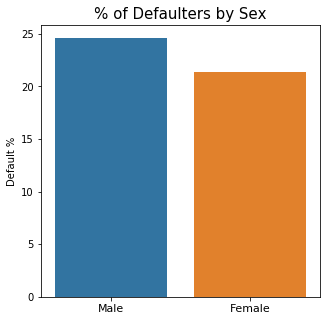

In [153]:
#Bar Chart
col1 = "SEX"
col2 = "DEFAULT"
tittle = "% of Defaulters by Sex"
xticks = ["Male", "Female"]
plot0(col1, col2, tittle, xticks, train)

Observations:

    Approximately 24.2% of the males defaulted.
    Approximately 20.8% of the females defaulted.

##### Defaulters by Marriage status 

In [156]:
marital_crosstab = pd.crosstab(train['DEFAULT'], train['MARRIAGE'], margins=True, normalize=False)
new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1 : 'Married', 2 : 'Single', 3:'Others'}
marital_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
marital_crosstab/marital_crosstab.loc['All']

MARRIAGE,0.0,Married,Single,Others,All
DEFAULT,,,,,
Non-default,0.972222,0.757457,0.78738,0.741176,0.773867
Default,0.027778,0.242543,0.21262,0.258824,0.226133
All,1.000000,1.000000,1.00000,1.000000,1.000000


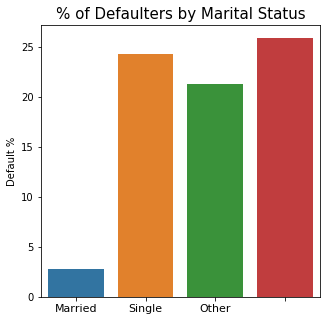

In [158]:
#Bar Chart
col1 = "MARRIAGE"
col2 = "DEFAULT"
tittle = "% of Defaulters by Marital Status"
xticks = ["Married", "Single", "Other"]
plot0(col1, col2, tittle, xticks, train)

Observations:

    Approximately 24.2% of the Married people defaulted.
    Approximately 21.2% of the Single people defaulted.

##### Defaulters by Level of Education

In [159]:
#Crosstab
education_crosstab = pd.crosstab(train['DEFAULT'], train['EDUCATION'], margins=True, normalize=False)
new_index = {0: 'Non-default', 1: 'Default', }
new_columns = {1 : 'Graduate school', 2 : 'University', 3 : 'High school', 4 : 'Others'}
education_crosstab.rename(index=new_index, columns=new_columns, inplace=True)
education_crosstab/education_crosstab.loc['All']

EDUCATION,0.0,Graduate school,University,High school,Others,5.0,6.0,All
DEFAULT,,,,,,,,
Non-default,1.0,0.802681,0.758699,0.741134,0.960526,0.923913,0.909091,0.773867
Default,0.0,0.197319,0.241301,0.258866,0.039474,0.076087,0.090909,0.226133
All,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


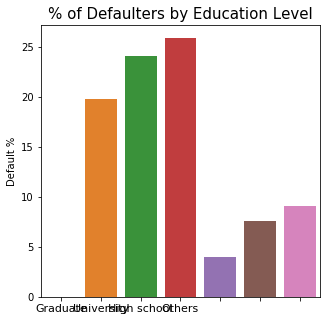

In [160]:
#Bar Chart
col1 = "EDUCATION"
col2 = "DEFAULT"
tittle = "% of Defaulters by Education Level"
xticks = ["Graduate", "University", "High school", "Others"]
plot0(col1, col2, tittle, xticks, train)

Observations:

    Approximately 25.8% of defaulters studied upto High School.
    Approximately 23.7% of defaulters studied upto University.
    Approximately 19.7% of defaulters studied upto Graduate School.

##### Defaulters by Age group

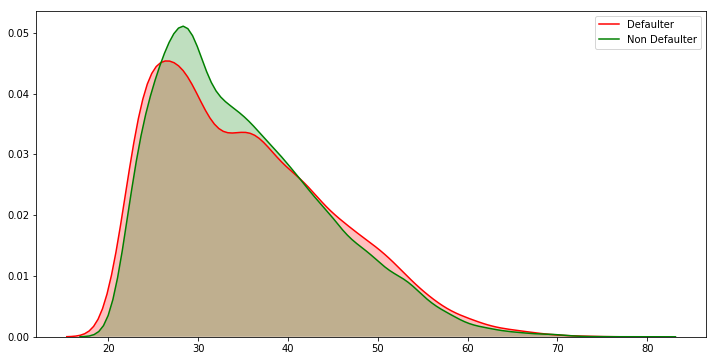

In [161]:
defaulters = train[train["DEFAULT"] == 1]
non_defaulters = train[train["DEFAULT"] == 0]
defaulters["Defaulter"] = defaulters["AGE"]
non_defaulters["Non Defaulter"] = non_defaulters["AGE"]
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(defaulters["Defaulter"], shade=True, color="r")
ax = sns.kdeplot(non_defaulters["Non Defaulter"], shade=True, color="g")

Observations:

    Defaulters seems to increase from the early 20s to the early 30s.
    Defaulters seems to decrease from the early 40s onward.

##### Defaulters correlated with credit limit

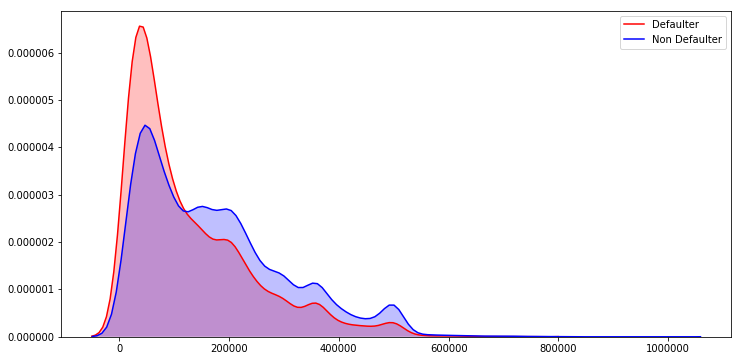

In [162]:
defaulters = train[train["DEFAULT"] == 1]
non_defaulters = train[train["DEFAULT"] == 0]
defaulters["Defaulter"] = defaulters["LIMIT_BAL"]
non_defaulters["Non Defaulter"] = non_defaulters["LIMIT_BAL"]
f, ax = plt.subplots(figsize=(12, 6))
ax = sns.kdeplot(defaulters["Defaulter"], shade=True, color="r")
ax = sns.kdeplot(non_defaulters["Non Defaulter"], shade=True, color="b")

In [168]:
# function to make a scatter plot
def plot1(label_list, label_dict, data, col,tittle,xlabel,ylabel, ticks):
  df = {}
  for i in label_list:
      df[i] = data.groupby([i, col]).size().unstack()
      df[i] = df[i][df[i].sum(axis=1)>25]
      df[i] = df[i].div(df[i].sum(axis=1), axis='index') # Calculate proportions
      df[i].sort_index(ascending=False, inplace=True)
          
  sns.set_palette(sns.light_palette("red", reverse=True))   # plot
  fig, ax = plt.subplots(1, 1, figsize=(6,4))

  for i in label_list:
      ax.scatter(x=df[i].index, y=df[i][1], label=label_dict.get(i), s=100, edgecolor='k', lw=1)          

  ax.set_ylim([0, 1])
  plt.xticks(ticks, rotation=0)
  ax.xaxis.set_ticks(ticks=ticks, minor=False)
  ax.grid(b=True, which='major', color='0.4', linestyle='--')
  lgd = plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=14)
  for tick in ax.yaxis.get_major_ticks():
      tick.label.set_fontsize(14) 
  for tick in ax.xaxis.get_major_ticks():
      tick.label.set_fontsize(14) 
  for spine in ax.spines.values():
      spine.set_edgecolor('k')
  sns.set_palette(sns.light_palette("green", reverse=True))
  plt.title(tittle, fontsize=17, y = 1.05) 
  plt.ylabel(xlabel, fontsize=14)
  plt.xlabel(ylabel, fontsize=14)
  plt.show()


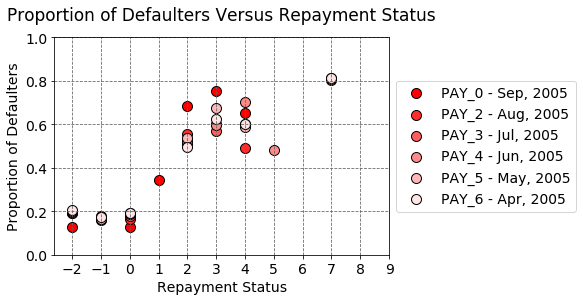

In [169]:
label_list =['PAY_0',  'PAY_2',  'PAY_3',  'PAY_4',  'PAY_5',  'PAY_6']
label_dict ={'PAY_0': 'PAY_0 - Sep, 2005', 
             'PAY_2': 'PAY_2 - Aug, 2005', 
             'PAY_3': 'PAY_3 - Jul, 2005', 
             'PAY_4': 'PAY_4 - Jun, 2005',  
             'PAY_5': 'PAY_5 - May, 2005',  
             'PAY_6': 'PAY_6 - Apr, 2005'}

col = 'DEFAULT'
tittle = 'Proportion of Defaulters Versus Repayment Status'
xlabel = 'Proportion of Defaulters'
ylabel = 'Repayment Status'
ticks = [-2, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8,9]
plot1(label_list, label_dict, train, col,tittle,xlabel,ylabel,ticks)

Observations:

    The proportion of defaulters in delinquency bucket 2 or more i.e. with payment delay for 2 or more months are much higher.

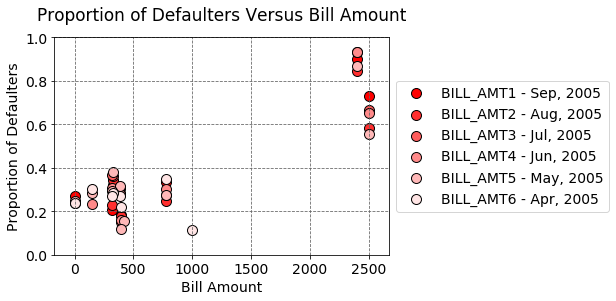

In [171]:
label_list =['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
label_dict ={'BILL_AMT1': 'BILL_AMT1 - Sep, 2005',  
             'BILL_AMT2': 'BILL_AMT2 - Aug, 2005',
             'BILL_AMT3': 'BILL_AMT3 - Jul, 2005', 
             'BILL_AMT4': 'BILL_AMT4 - Jun, 2005',  
             'BILL_AMT5': 'BILL_AMT5 - May, 2005', 
             'BILL_AMT6': 'BILL_AMT6 - Apr, 2005'}

col = 'DEFAULT'
tittle = 'Proportion of Defaulters Versus Bill Amount'
xlabel = 'Proportion of Defaulters'
ylabel = 'Bill Amount'
ticks = []
for i in range(0, 3000, 500):
    ticks.append(round(i,1))
plot1(label_list, label_dict, train, col,tittle,xlabel,ylabel,ticks)

Observations:

    The proportion of defaulters is positively correlated with bill amount in recent months.

### Modelling

In [175]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn import preprocessing, metrics
from xgboost import XGBClassifier
warnings.filterwarnings('ignore') # to supress warnings
from sklearn.model_selection import train_test_split


In [177]:
x = train.drop(['DEFAULT'],axis = 1)
y = train.DEFAULT

# rescale the metrics to the same mean and standard deviation
scaler = preprocessing.StandardScaler()
x = scaler.fit(x).transform(x)

# Further divide the train data into train test split 70% & 30% respectively
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=2)

In [178]:
# list of different classifiers we are going to test
clfs = {
'LogisticRegression' : LogisticRegression(),
'GaussianNB': GaussianNB(),
'RandomForest': RandomForestClassifier(),
'DecisionTreeClassifier': DecisionTreeClassifier(),
'SVM': SVC(),
'KNeighborsClassifier': KNeighborsClassifier(),
'GradientBoosting': GradientBoostingClassifier(),
'XGBClassifier': XGBClassifier()
}

In [179]:
# code block to test all models in clfs and generate a report
models_report = pd.DataFrame(columns = ['Model', 'Precision_score', 'Recall_score','F1_score', 'Accuracy'])

for clf, clf_name in zip(clfs.values(), clfs.keys()):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    y_score = clf.score(x_test,y_test)
    
    #print('Calculating {}'.format(clf_name))
    t = pd.Series({ 
                     'Model': clf_name,
                     'Precision_score': metrics.precision_score(y_test, y_pred),
                     'Recall_score': metrics.recall_score(y_test, y_pred),
                     'F1_score': metrics.f1_score(y_test, y_pred),
                     'Accuracy': metrics.accuracy_score(y_test, y_pred)}
                   )

    models_report = models_report.append(t, ignore_index = True)

models_report


,Model,Precision_score,Recall_score,F1_score,Accuracy
0,LogisticRegression,0.683810,0.235256,0.350073,0.802519
1,GaussianNB,0.368237,0.619921,0.462027,0.673630
2,RandomForest,0.599246,0.312582,0.410853,0.797333
3,DecisionTreeClassifier,0.369184,0.400393,0.384156,0.709778
4,SVM,0.670833,0.316514,0.430098,0.810370
5,KNeighborsClassifier,0.547778,0.323067,0.406430,0.786667
6,GradientBoosting,0.663252,0.339450,0.449068,0.811704
7,XGBClassifier,0.662760,0.333552,0.443766,0.810963


From above report we can see that highest accuracy is given by XGboost followed by GradientBoosting, let us compare both

In [187]:
# Function to optimize model using gridsearch 
def gridsearch(model, params,x_train, x_test, y_train, y_test, kfold):
    gs = GridSearchCV(model, params, scoring='accuracy', n_jobs=-1, cv=kfold)
    gs.fit(x_train, y_train)
    print( 'Best params: '), gs.best_params_
    print( 'Best AUC on Train set: '), gs.best_score_
    print( 'Best AUC on Test set: '), gs.score(x_test, y_test)

# Function to generate confusion matrix
def confmat(pred, y_test):
    conmat = np.array(confusion_matrix(y_test, pred, labels=[1,0]))
    conf = pd.DataFrame(conmat, index=['Defaulter', 'Not Defaulter'],
                             columns=['Predicted Defaulter', 'Predicted Not Defaulter'])
    print( conf)

# Function to plot roc curve
def roc(prob, y_test):
    y_score = prob
    fpr = dict()
    tpr = dict()
    roc_auc=dict()
    fpr[1], tpr[1], _ = roc_curve(y_test, y_score)
    roc_auc[1] = auc(fpr[1], tpr[1])
    plt.figure(figsize=[7,7])
    plt.plot(fpr[1], tpr[1], label='Roc curve (area=%0.2f)' %roc_auc[1], linewidth=4)
    plt.plot([1,0], [1,0], 'k--', linewidth=4)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive rate', fontsize=15)
    plt.ylabel('True Positive rate', fontsize=15)
    plt.title('ROC curve for Credit Default', fontsize=16)
    plt.legend(loc='Lower Right')
    plt.show()
    
def model(md, x_train, y_train,x_test, y_test):
    md.fit(x_train, y_train)
    pred = md.predict(x_test)
    #prob = md.predict_proba(x_test)[:,1]
    print( ' ' )
    print( 'Accuracy on Train set: '), md.score(x_train, y_train)
    print( 'Accuracy on Test set: '), md.score(x_test, y_test)
    print( ' ')
    print(classification_report(y_test, pred))
    print( ' ')
    print( 'Confusion Matrix')
    confmat(pred, y_test)
    #roc(prob, y_test)
    return md

#### Parameter tuning


There are a few parameters that require tuning to improve the performance. I use GridSearchCV method to test model through a series of parameter values.

##### GradientBoosting


In [188]:
# Use gridsearch to fine tune the parameters
gb = GradientBoostingClassifier()
gb_params = {'n_estimators': [100,200,300],'learning_rate' : [0.01, 0.02, 0.05, 0.1]}
gridsearch(gb, gb_params,x_train, x_test, y_train, y_test,5)

Best params: 
Best AUC on Train set: 
Best AUC on Test set: 


In [189]:
# feature selection with the best model from grid search
gb = GradientBoostingClassifier(learning_rate= 0.02, max_depth= 7,n_estimators=300, max_features = 0.9,min_samples_leaf = 5)
model_gb = model(gb, x_train, y_train,x_test, y_test)

 
Accuracy on Train set: 
Accuracy on Test set: 
 
              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88      5224
         1.0       0.64      0.34      0.45      1526

   micro avg       0.81      0.81      0.81      6750
   macro avg       0.74      0.64      0.66      6750
weighted avg       0.79      0.81      0.78      6750

 
Confusion Matrix
               Predicted Defaulter  Predicted Not Defaulter
Defaulter                      521                     1005
Not Defaulter                  292                     4932


##### XGboost

In [190]:
# Use gridsearch to fine tune the parameters
xgb = XGBClassifier()
xgb_params = {'n_estimators':[200,300],'learning_rate':[0.05,0.02], 'max_depth':[4],'min_child_weight':[0],'gamma':[0]}
gridsearch(xgb, xgb_params,x_train, x_test, y_train, y_test,5)

Best params: 
Best AUC on Train set: 
Best AUC on Test set: 


In [191]:
# feature selection with the best model from grid search
xgb = XGBClassifier(
 learning_rate =0.05,
 n_estimators=200,
 max_depth=4,
 min_child_weight=0,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=1,
 scale_pos_weight=1,
 seed=27)
model_xgb = model(xgb, x_train, y_train,x_test, y_test)

 
Accuracy on Train set: 
Accuracy on Test set: 
 
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89      5224
         1.0       0.66      0.33      0.44      1526

   micro avg       0.81      0.81      0.81      6750
   macro avg       0.75      0.64      0.66      6750
weighted avg       0.79      0.81      0.79      6750

 
Confusion Matrix
               Predicted Defaulter  Predicted Not Defaulter
Defaulter                      510                     1016
Not Defaulter                  262                     4962


The classification metrics of iterest for this fairly imbalanced dataset are:

    precision = tp / (tp + fp)
    recall = tp / (tp + fn)
    f1 = 2(precision)(recall) / (precision + recall)
    Roc curve area
Depending upon banks operational costs & ideology a large bank may follow the principal that fewer False Positives are preferable over a few more False Negatives to be able to lend more & spend less on investigations on the contrary a conservative approach would go with the opposite i.e more accuracy.

###### Therefore we see that XGBoost trains with little higher accuracy and auc score than GradientBoost. We will use XGBoost for final predictions. i.e. fewer False Positives are preferable over a few more False Negatives

In [192]:
#Predict final values on Test data set
test['PREDICTED_STATUS']=np.int_(model_gb.predict(test.drop(['DEFAULT'],axis = 1)))
test.index.names = ['ID']

In [193]:
test['PREDICTED_STATUS'].to_csv("credit_card_default_TRAIN_Predict.csv")

In [195]:
test.PREDICTED_STATUS.mean()*100

7.346666666666667